<a href="https://colab.research.google.com/github/maschu09/mless/blob/main/time_series_forecasting/5_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author : Paul v. Werthern


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


from checkpoint
MSE TEST 117.335


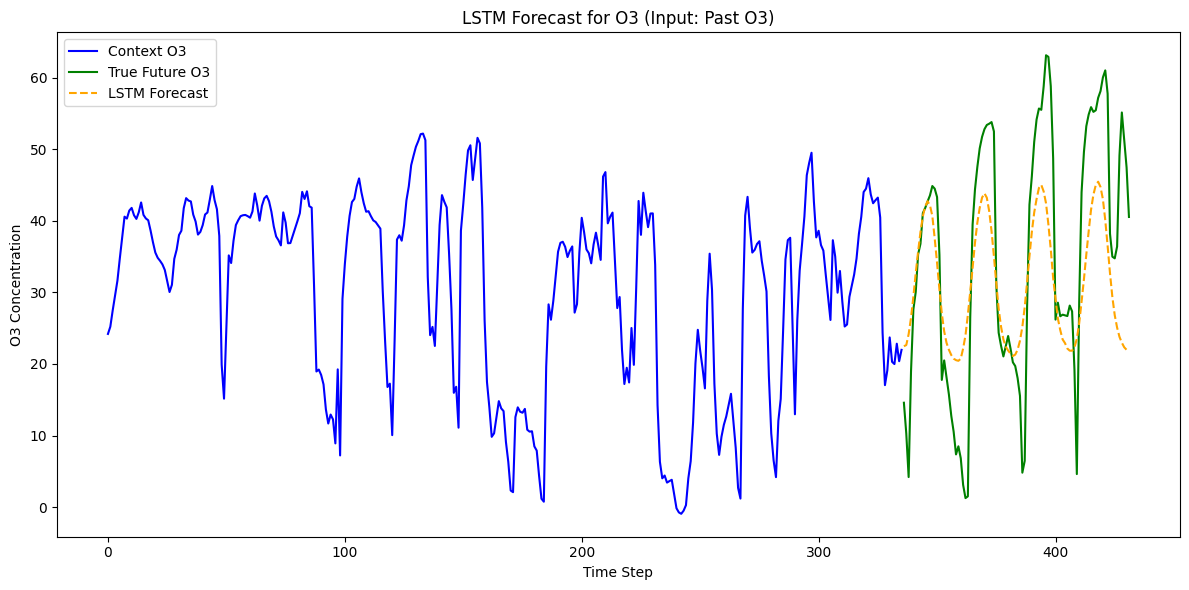

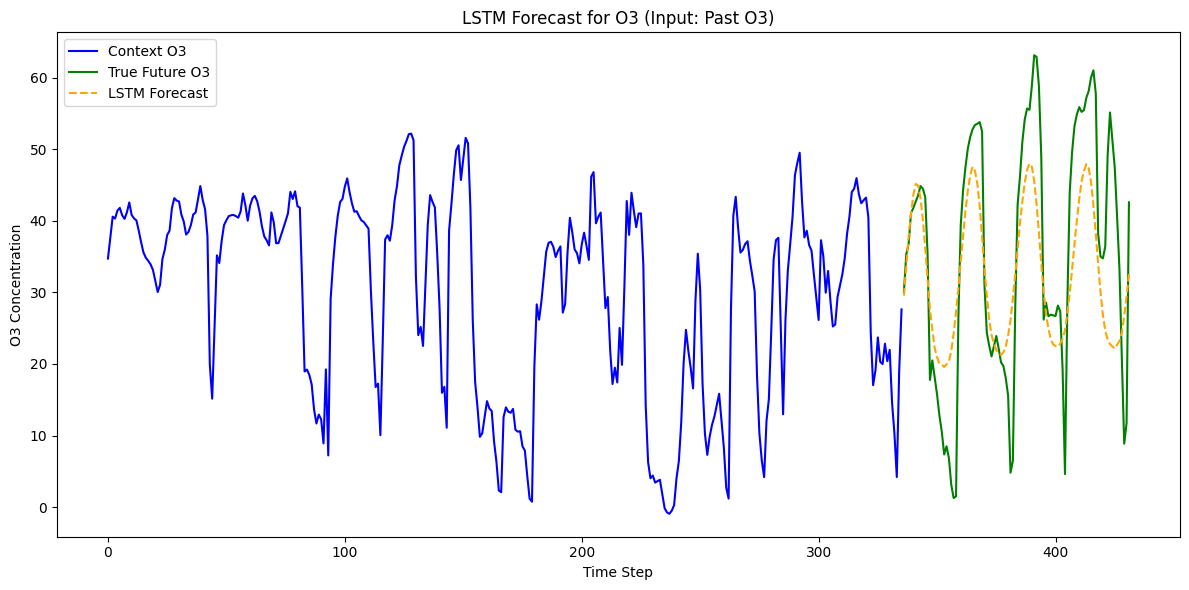

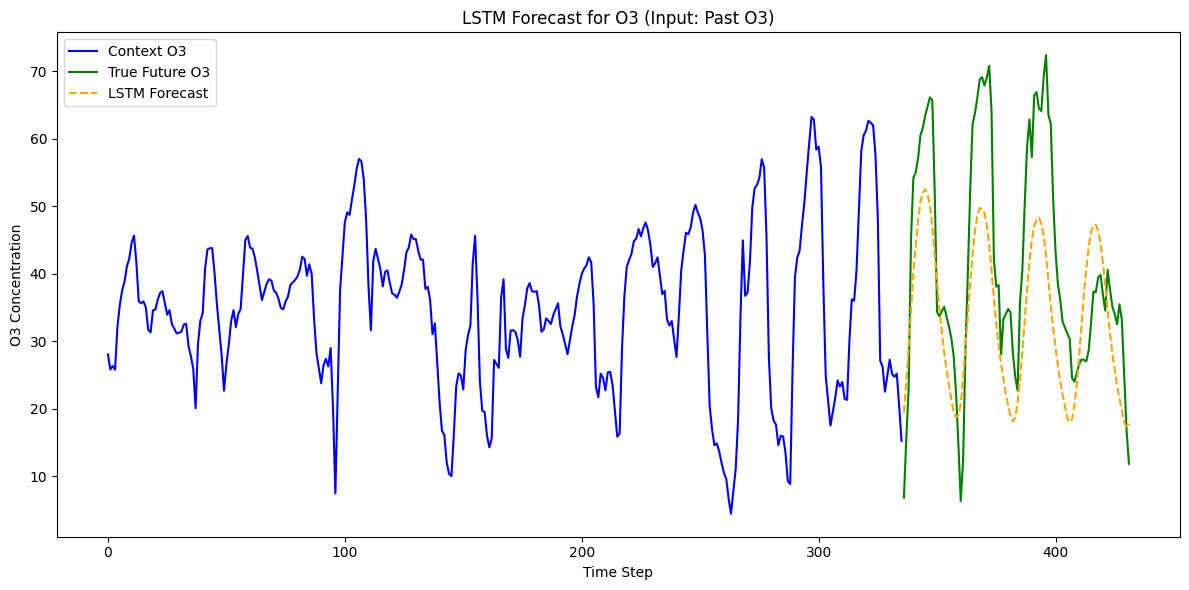

In [7]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from google.colab import drive


drive.mount("/content/drive")

# Settings for forecasting
context_window = 336           # how many past time steps the model sees
prediction_horizon = 96        # how many time steps forecast
model_id = "lstm_o3_on_o3"     # to distinguish different setups it later

# Define folders where models and forecasts will be stored
checkpoint_dir = "/content/drive/MyDrive/timeseries_datanew/lstm_checkpoints"
forecast_dir   = "/content/drive/MyDrive/timeseries_datanew/lstm_forecasts"
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(forecast_dir, exist_ok=True)

# Load the multivariate dataset from Drive
with open("/content/drive/MyDrive/timeseries_datanew/X_train_multi.pkl", "rb") as f:
    X_train_full = pickle.load(f)
with open("/content/drive/MyDrive/timeseries_datanew/X_test_multi.pkl", "rb") as f:
    X_test_full = pickle.load(f)
with open("/content/drive/MyDrive/timeseries_datanew/y_train_multi.pkl", "rb") as f:
    y_train_full = pickle.load(f)
with open("/content/drive/MyDrive/timeseries_datanew/y_test_multi.pkl", "rb") as f:
    y_test_full = pickle.load(f)

# Extract just the O3 data (column 1)
X_train = X_train_full[:, :, 1:2]   # 1:2 important so it is 3d
X_test  = X_test_full[:, :, 1:2]
y_train = y_train_full[:, :, 1]     # we take only 03 as target
y_test  = y_test_full[:, :, 1]



# define model (lstm)
lstm_model = Sequential([
    Input(shape=(context_window, 1)),     #input shape (only 1 feature since only 03 to o3)
    LSTM(64, return_sequences=False),     # one LSTM with 64 units
    Dense(96)                             #output 96 future values
])

# Compile the model with mse-loss and ada-optimizer
lstm_model.compile(optimizer=Adam(), loss=MeanSquaredError())

# important so save best model each time when there is an improvement
checkpoint_path = os.path.join(checkpoint_dir, f"{model_id}.h5")
checkpoint_cb = ModelCheckpoint(
    checkpoint_path, monitor="val_loss", save_best_only=True, verbose=1
)

# train model (if there is no checkpoint)
if os.path.exists(checkpoint_path):
    print("from checkpoint")
    lstm_model = load_model(checkpoint_path, custom_objects={"mse": MeanSquaredError()})
else:

    history = lstm_model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=64,
        callbacks=[checkpoint_cb],
        verbose=1
    )

# use best model to make predicitons
y_pred_flat = lstm_model.predict(X_test, verbose=0)
y_pred = y_pred_flat.reshape(-1, prediction_horizon, 1)  # shape: (samples, 96, 1)

# calculate mse
mse = mean_squared_error(y_test.reshape(-1), y_pred.reshape(-1))
print(f"MSE TEST {mse:.3f}")

# save data to Drive
np.save(f"{forecast_dir}/X_context_{model_id}.npy", X_test)
np.save(f"{forecast_dir}/y_true_{model_id}.npy", y_test)
np.save(f"{forecast_dir}/forecast_{model_id}.npy", y_pred)

# Plot example forecast (index 0) from the test set
example_idx = 0
plt.figure(figsize=(12, 6))
plt.plot(range(context_window), X_test[example_idx, :, 0], label="Context O3", color="blue")
plt.plot(range(context_window, context_window + prediction_horizon), y_test[example_idx], label="True Future O3", color="green")
plt.plot(range(context_window, context_window + prediction_horizon), y_pred[example_idx, :, 0], label="LSTM Forecast", color="orange", linestyle="--")
plt.title("LSTM Forecast for O3 (Input: Past O3)")
plt.xlabel("Time Step")
plt.ylabel("O3 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

# Plot example forecast (index 5) from the test set
example_idx = 5
plt.figure(figsize=(12, 6))
plt.plot(range(context_window), X_test[example_idx, :, 0], label="Context O3", color="blue")
plt.plot(range(context_window, context_window + prediction_horizon), y_test[example_idx], label="True Future O3", color="green")
plt.plot(range(context_window, context_window + prediction_horizon), y_pred[example_idx, :, 0], label="LSTM Forecast", color="orange", linestyle="--")
plt.title("LSTM Forecast for O3 (Input: Past O3)")
plt.xlabel("Time Step")
plt.ylabel("O3 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

# Plot example forecast (index 10) from the test set
example_idx = 10
plt.figure(figsize=(12, 6))
plt.plot(range(context_window), X_test[example_idx, :, 0], label="Context O3", color="blue")
plt.plot(range(context_window, context_window + prediction_horizon), y_test[example_idx], label="True Future O3", color="green")
plt.plot(range(context_window, context_window + prediction_horizon), y_pred[example_idx, :, 0], label="LSTM Forecast", color="orange", linestyle="--")
plt.title("LSTM Forecast for O3 (Input: Past O3)")
plt.xlabel("Time Step")
plt.ylabel("O3 Concentration")
plt.legend()
plt.tight_layout()
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


checkpoint
MSE TEST 116.859


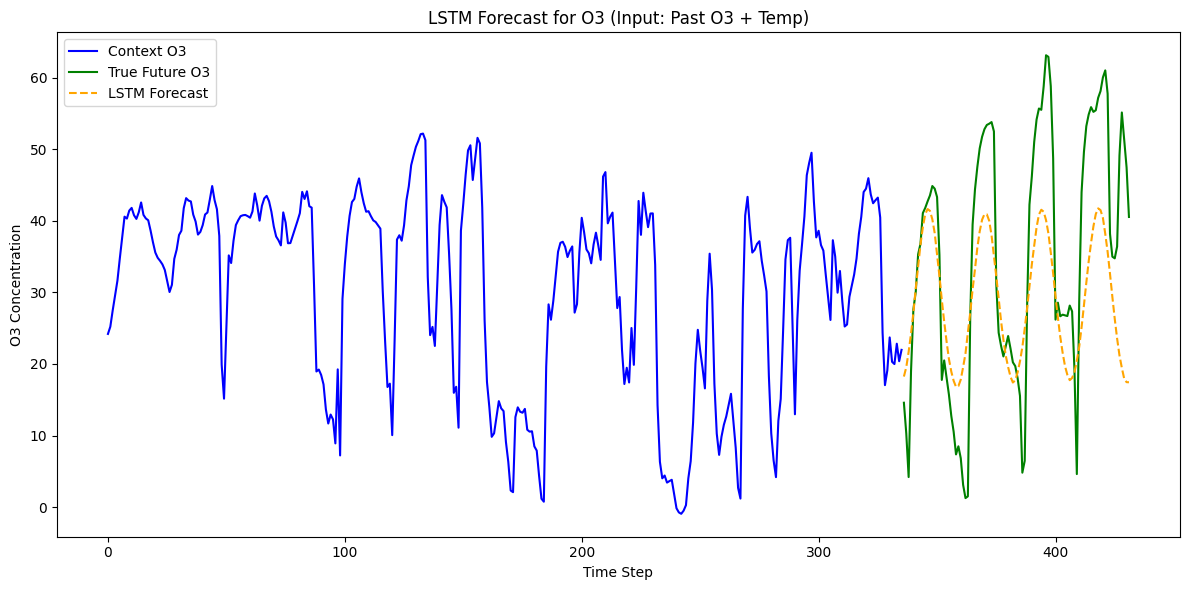

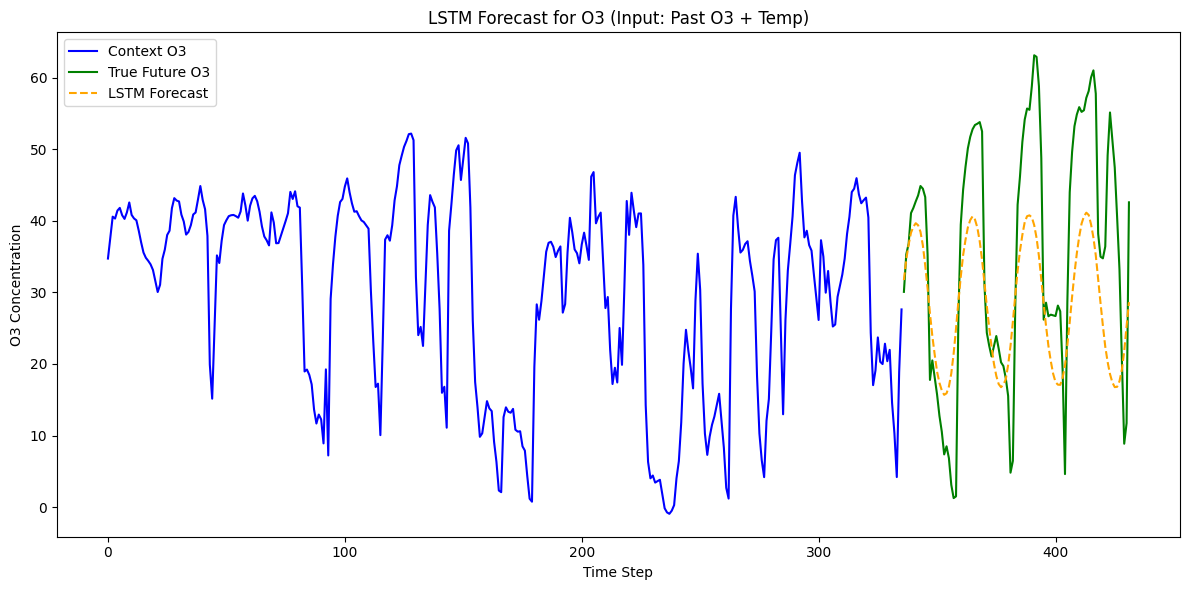

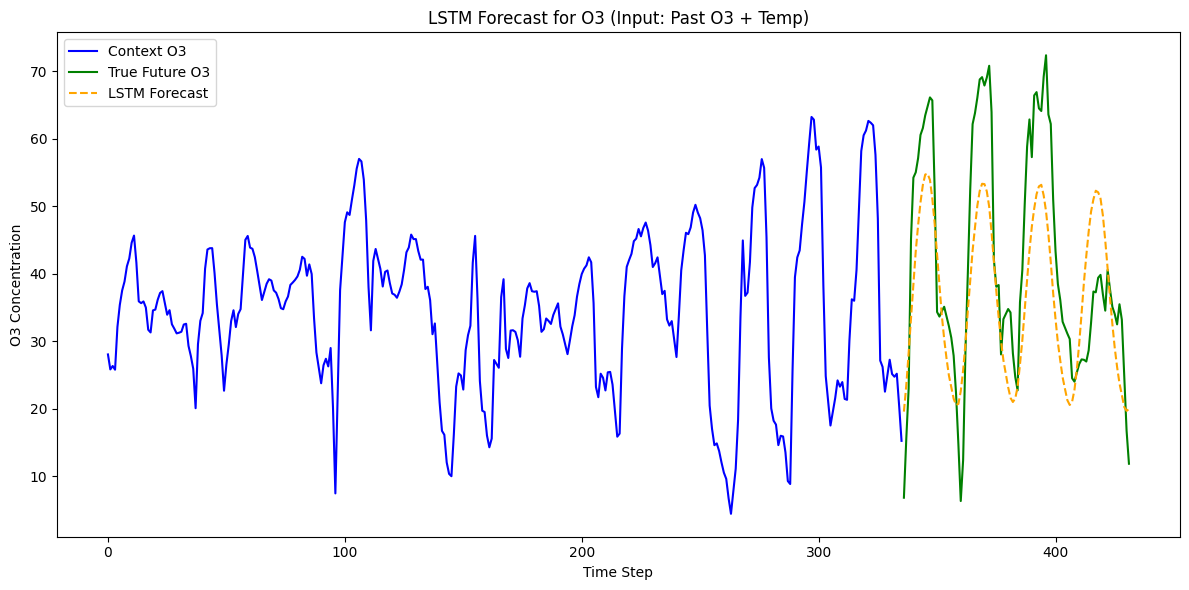

In [6]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from google.colab import drive


drive.mount("/content/drive")

# Settings for forecasting
context_window = 336           # how many past time steps the model sees
prediction_horizon = 96        # how many time steps forecast
model_id = "lstm_o3_on_o3_temp"     # to distinguish it later

# Define folders where models and forecasts will be stored
checkpoint_dir = "/content/drive/MyDrive/timeseries_datanew/lstm_checkpoints"
forecast_dir   = "/content/drive/MyDrive/timeseries_datanew/lstm_forecasts"
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(forecast_dir, exist_ok=True)

# Load the multivariate dataset from Drive
with open("/content/drive/MyDrive/timeseries_datanew/X_train_multi.pkl", "rb") as f:
    X_train_full = pickle.load(f)
with open("/content/drive/MyDrive/timeseries_datanew/X_test_multi.pkl", "rb") as f:
    X_test_full = pickle.load(f)
with open("/content/drive/MyDrive/timeseries_datanew/y_train_multi.pkl", "rb") as f:
    y_train_full = pickle.load(f)
with open("/content/drive/MyDrive/timeseries_datanew/y_test_multi.pkl", "rb") as f:
    y_test_full = pickle.load(f)

# Extract Temp and 03 (column 1 and 2)
X_train = X_train_full[:, :, :2]   # as mentioned above we need the last 2 columns as input now (mulitvariate)
X_test  = X_test_full[:, :, :2]
y_train = y_train_full[:, :, 1]     # again only o3 as output
y_test  = y_test_full[:, :, 1]

# define model (lstm)
lstm_model = Sequential([
    Input(shape=(context_window, 2)),     #input shape now with 2 dimensions since were also using temp toghether with o3
    LSTM(64, return_sequences=False),     # one LSTM with 64 units
    Dense(96)                             #output 96 future values
])

# Compile the model with mse-loss and ada-optimizer
lstm_model.compile(optimizer=Adam(), loss=MeanSquaredError())

# important so save best model each time when there is an improvement
checkpoint_path = os.path.join(checkpoint_dir, f"{model_id}.h5")
checkpoint_cb = ModelCheckpoint(
    checkpoint_path, monitor="val_loss", save_best_only=True, verbose=1
)

# train model (if there is no checkpoint)
if os.path.exists(checkpoint_path):
    print("checkpoint")
    lstm_model = load_model(checkpoint_path, custom_objects={"mse": MeanSquaredError()})
else:

    history = lstm_model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=64,
        callbacks=[checkpoint_cb],
        verbose=1
    )

# use best model to make predicitons
y_pred_flat = lstm_model.predict(X_test, verbose=0)
y_pred = y_pred_flat.reshape(-1, prediction_horizon, 1)  # shape: (samples, 96, 1)

# calculate mse
mse = mean_squared_error(y_test.reshape(-1), y_pred.reshape(-1))
print(f"MSE TEST {mse:.3f}")

# save data to Drive
np.save(f"{forecast_dir}/X_context_{model_id}.npy", X_test)
np.save(f"{forecast_dir}/y_true_{model_id}.npy", y_test)
np.save(f"{forecast_dir}/forecast_{model_id}.npy", y_pred)

# Plot example forecast from the test set for different steps
example_idx = 0
plt.figure(figsize=(12, 6))
plt.plot(range(context_window), X_test[example_idx, :, 1], label="Context O3", color="blue")
plt.plot(range(context_window, context_window + prediction_horizon), y_test[example_idx], label="True Future O3", color="green")
plt.plot(range(context_window, context_window + prediction_horizon), y_pred[example_idx, :, 0], label="LSTM Forecast", color="orange", linestyle="--")
plt.title("LSTM Forecast for O3 (Input: Past O3 + Temp)")
plt.xlabel("Time Step")
plt.ylabel("O3 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

example_idx = 5
plt.figure(figsize=(12, 6))
plt.plot(range(context_window), X_test[example_idx, :, 1], label="Context O3", color="blue")
plt.plot(range(context_window, context_window + prediction_horizon), y_test[example_idx], label="True Future O3", color="green")
plt.plot(range(context_window, context_window + prediction_horizon), y_pred[example_idx, :, 0], label="LSTM Forecast", color="orange", linestyle="--")
plt.title("LSTM Forecast for O3 (Input: Past O3 + Temp)")
plt.xlabel("Time Step")
plt.ylabel("O3 Concentration")
plt.legend()
plt.tight_layout()
plt.show()

example_idx = 10
plt.figure(figsize=(12, 6))
plt.plot(range(context_window), X_test[example_idx, :, 1], label="Context O3", color="blue")
plt.plot(range(context_window, context_window + prediction_horizon), y_test[example_idx], label="True Future O3", color="green")
plt.plot(range(context_window, context_window + prediction_horizon), y_pred[example_idx, :, 0], label="LSTM Forecast", color="orange", linestyle="--")
plt.title("LSTM Forecast for O3 (Input: Past O3 + Temp)")
plt.xlabel("Time Step")
plt.ylabel("O3 Concentration")
plt.legend()
plt.tight_layout()
plt.show()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


checkpoint.
Test MSE: 88.490


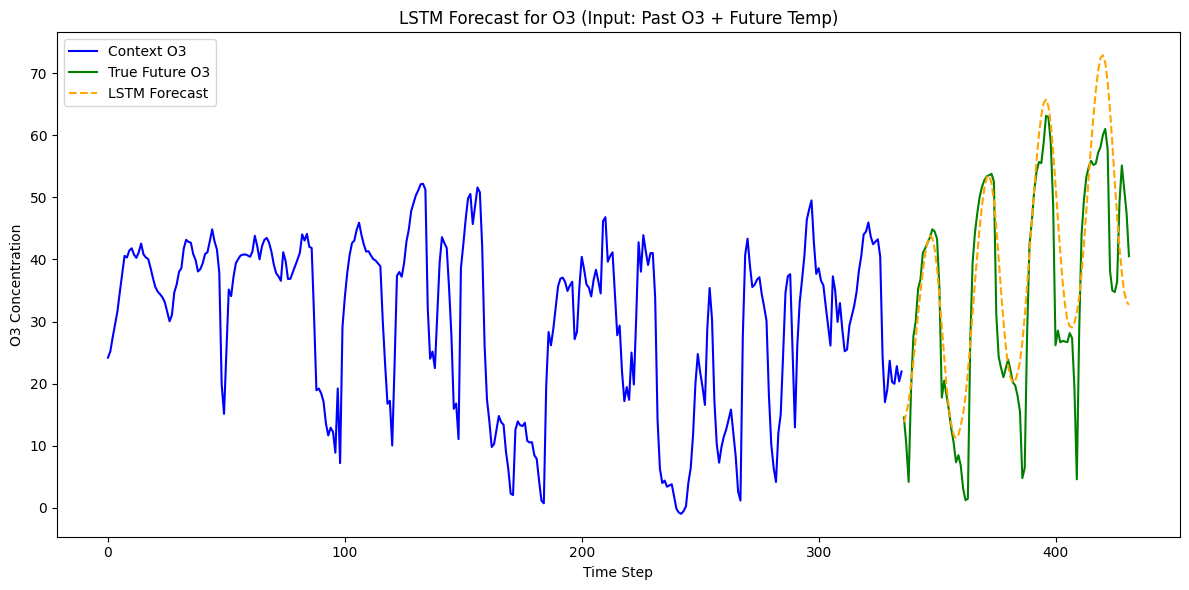

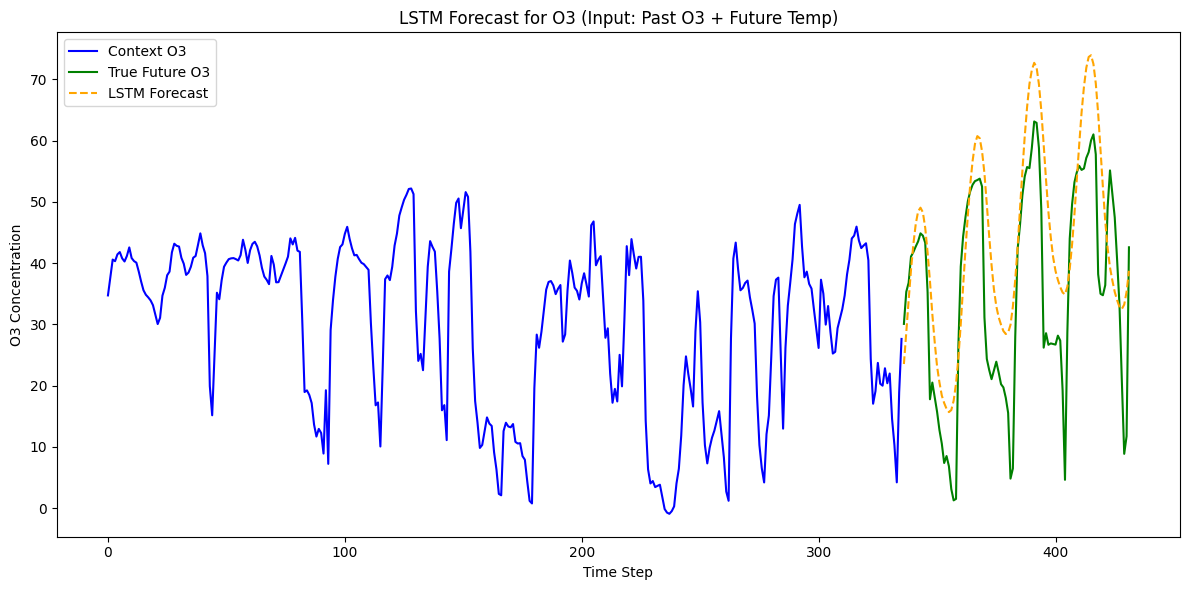

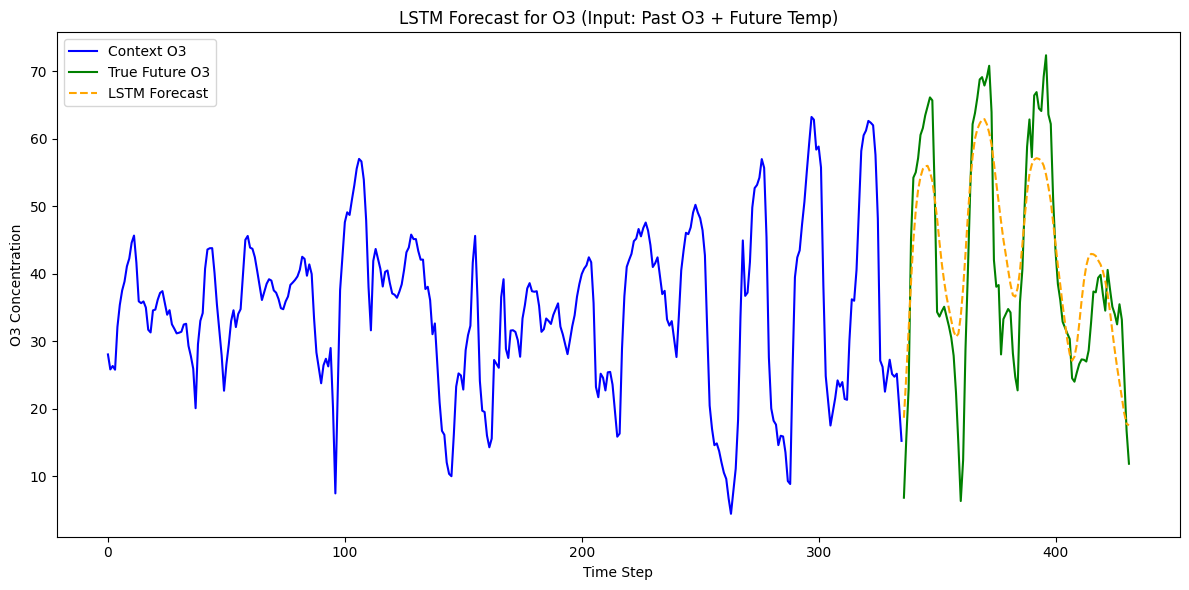

In [9]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from google.colab import drive

# Mount Google Drive to access data
drive.mount("/content/drive")

# Settings for forecasting
context_window = 336           # how many past time steps the model sees (e.g. past 14 days)
prediction_horizon = 96        # how many time steps forecast (e.g. next 4 days)
model_id = "lstm_o3_on_o3_future_temp"     # to distinguish it later

# Define folders where models and forecasts will be stored
checkpoint_dir = "/content/drive/MyDrive/timeseries_datanew/lstm_checkpoints"
forecast_dir   = "/content/drive/MyDrive/timeseries_datanew/lstm_forecasts"
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(forecast_dir, exist_ok=True)

# Load the multivariate dataset from Drive
with open("/content/drive/MyDrive/timeseries_datanew/X_train_multi.pkl", "rb") as f:
    X_train_full = pickle.load(f)
with open("/content/drive/MyDrive/timeseries_datanew/X_test_multi.pkl", "rb") as f:
    X_test_full = pickle.load(f)
with open("/content/drive/MyDrive/timeseries_datanew/y_train_multi.pkl", "rb") as f:
    y_train_full = pickle.load(f)
with open("/content/drive/MyDrive/timeseries_datanew/y_test_multi.pkl", "rb") as f:
    y_test_full = pickle.load(f)

# Extract input and target features:
# Column 0 = temperature, column 1 = O3
X_o3_train = X_train_full[:, :, 1]     # past O3 values
X_o3_test  = X_test_full[:, :, 1]
y_temp_train = y_train_full[:, :, 0]   # future temperature (as external input)
y_temp_test  = y_test_full[:, :, 0]
y_o3_train = y_train_full[:, :, 1]     # future O3 values (target)
y_o3_test  = y_test_full[:, :, 1]

# IMPORTANT: i understood the execercise this way: we use Only the future temp so only in der 96 prediciton steps

# this input array has dimension length_training_samples bzw. length_test_samples * (336 + 96) * 2
# the first 336 will have only o3 (temp =0)
# the next 96 (prediciton horizon) will have only temp (03 =0) beacuse we want to predict 03
X_combined_train = np.zeros((X_o3_train.shape[0], context_window + prediction_horizon, 2), dtype=np.float32)
X_combined_test  = np.zeros((X_o3_test.shape[0],  context_window + prediction_horizon, 2), dtype=np.float32)

# Fill in first 336 time steps (column 0) with past O3
X_combined_train[:, :context_window, 0] = X_o3_train
X_combined_test[:,  :context_window, 0] = X_o3_test

# Fill in last 96 time steps (column 1) with future Temp

# The past temperature values are NOT used here
X_combined_train[:, context_window:, 1] = y_temp_train
X_combined_test[:,  context_window:, 1] = y_temp_test

# Define target: future O3 values (96 time steps)
y_train = y_o3_train
y_test  = y_o3_test


# input is sequence of 432 time steps with 2 features per step
# output sequence of 96 predicted O3 values
lstm_model = Sequential([
    Input(shape=(context_window + prediction_horizon, 2)),  # input shape: (432, 2)
    LSTM(64, return_sequences=False),                        # one LSTM with 64 units
    Dense(96)                                                # output: 96 future values
])

# Compile the model with mse-loss and ada-optimizer
lstm_model.compile(optimizer=Adam(), loss=MeanSquaredError())

# Save best model only if validation improves
checkpoint_path = os.path.join(checkpoint_dir, f"{model_id}.h5")
checkpoint_cb = ModelCheckpoint(
    checkpoint_path, monitor="val_loss", save_best_only=True, verbose=1
)

# Train model (if no checkpoint exists)
if os.path.exists(checkpoint_path):
    print("checkpoint.")
    lstm_model = load_model(checkpoint_path, custom_objects={"mse": MeanSquaredError()})
else:

    history = lstm_model.fit(
        X_combined_train, y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=64,
        callbacks=[checkpoint_cb],
        verbose=1
    )

# Use best model to make predictions
y_pred_flat = lstm_model.predict(X_combined_test, verbose=0)
y_pred = y_pred_flat.reshape(-1, prediction_horizon, 1)  # shape: (samples, 96, 1)

# Calculate MSE
mse = mean_squared_error(y_test.reshape(-1), y_pred.reshape(-1))
print(f"Test MSE: {mse:.3f}")

# Save data to Drive
np.save(f"{forecast_dir}/X_context_{model_id}.npy", X_combined_test)
np.save(f"{forecast_dir}/y_true_{model_id}.npy", y_test)
np.save(f"{forecast_dir}/forecast_{model_id}.npy", y_pred)

# Plot example forecast from the test set
example_idx = 0
plt.figure(figsize=(12, 6))
plt.plot(range(context_window), X_combined_test[example_idx, :context_window, 0], label="Context O3", color="blue")
plt.plot(range(context_window, context_window + prediction_horizon), y_test[example_idx], label="True Future O3", color="green")
plt.plot(range(context_window, context_window + prediction_horizon), y_pred[example_idx, :, 0], label="LSTM Forecast", color="orange", linestyle="--")
plt.title("LSTM Forecast for O3 (Input: Past O3 + Future Temp)")
plt.xlabel("Time Step")
plt.ylabel("O3 Concentration")
plt.legend()
plt.tight_layout()
plt.show()
# Plot example forecast from the test set
example_idx = 5
plt.figure(figsize=(12, 6))
plt.plot(range(context_window), X_combined_test[example_idx, :context_window, 0], label="Context O3", color="blue")
plt.plot(range(context_window, context_window + prediction_horizon), y_test[example_idx], label="True Future O3", color="green")
plt.plot(range(context_window, context_window + prediction_horizon), y_pred[example_idx, :, 0], label="LSTM Forecast", color="orange", linestyle="--")
plt.title("LSTM Forecast for O3 (Input: Past O3 + Future Temp)")
plt.xlabel("Time Step")
plt.ylabel("O3 Concentration")
plt.legend()
plt.tight_layout()
plt.show()
# Plot example forecast from the test set
example_idx = 10
plt.figure(figsize=(12, 6))
plt.plot(range(context_window), X_combined_test[example_idx, :context_window, 0], label="Context O3", color="blue")
plt.plot(range(context_window, context_window + prediction_horizon), y_test[example_idx], label="True Future O3", color="green")
plt.plot(range(context_window, context_window + prediction_horizon), y_pred[example_idx, :, 0], label="LSTM Forecast", color="orange", linestyle="--")
plt.title("LSTM Forecast for O3 (Input: Past O3 + Future Temp)")
plt.xlabel("Time Step")
plt.ylabel("O3 Concentration")
plt.legend()
plt.tight_layout()
plt.show()




RESULTS:

Results
The experiment for the first task (O3 to 03 only) shows that the model tends to underestimate the variation in ozone concentration: predicted minimum values are too high, and predicted maximum values are too low. However, the periodicity of the signal is still captured. The MSE on the test set is approximately 117.



In the second task, where temperature is added as an additional input feature, the results do not show a clear improvement over the first task. The MSE decreases only slightly to 116, and the general prediction pattern remains similar.

(This suggests that the added temperature feature was either not informative enough or not effectively utilized by the model.)

In contrast, the third experiment — which includes future temperature as an input — leads to a notable improvement in prediction quality. The model now better captures the range of variation in O3 values (i.e., minimum and maximum levels are more accurately predicted). Additionally, the forecast follows the temporal trend of the true O3 curve much more closely. The MSE is only abpout 90.

Whereas the predictions from the first two tasks mainly repeat a general pattern, the third model adapts more synchronously to actual fluctuations in the test data. This improvement is not surprising, as we provide the model with the actual future temperature, which serves as a strong external driver of O3 dynamics.